<h1>Iris Data Project</h1><br>
In this notebook, I want to explore the features of the Iris dataset and create a model to predict the class of each flower.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

We will start by importing the data file from our machine and making a dataframe from it<br>
After importing the data for the first time, I noticed that there were no headers in the file and adding them after removed the first row. We can either use header=None then add them in the next cell or add the headers as we create the df to fix this. I chose the latter

In [2]:
headers = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
iris_df = pd.read_csv(r'C:\users\efrut\OneDrive\Desktop\Coding practice\Iris Data Set\iris.data', names=headers)
print(iris_df.head())

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [3]:
print(iris_df.shape)

(150, 5)


We have 150 rows in our df

In [4]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
iris_df.describe(include=['O'])

,class
count,150
unique,3
top,Iris-versicolor
freq,50


We now have some basic information about our dataset. Nothing is missing, and we have 50 of each of the flower classes. Next, we'll take a look at the distributions of the features in our dataset.

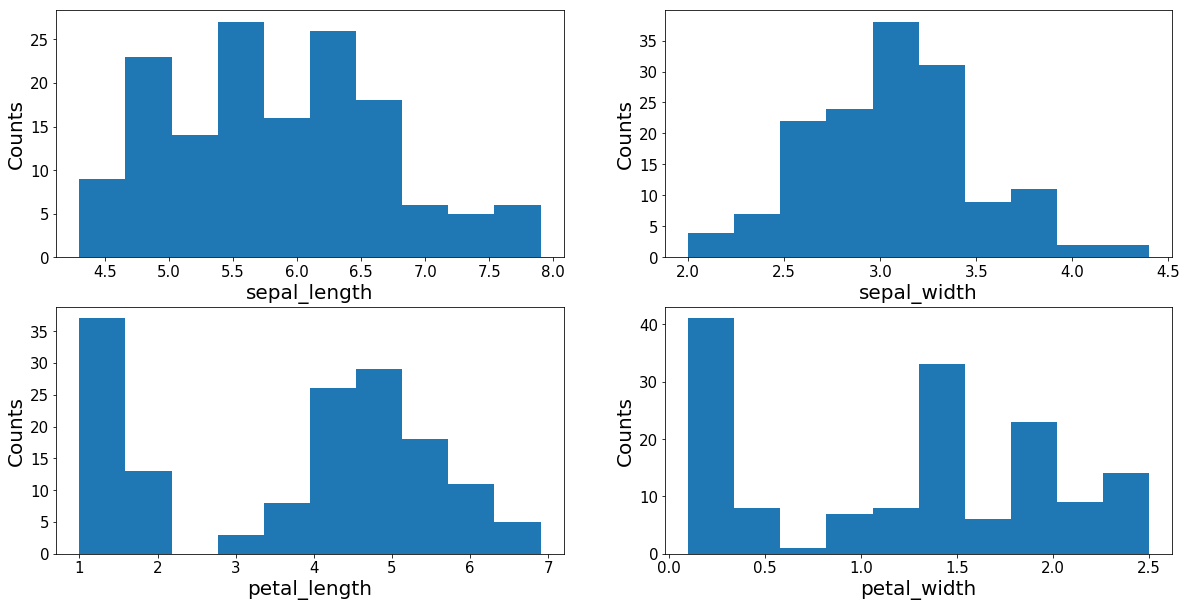

In [6]:
%matplotlib inline

plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# Specify the features of interest
features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
xaxes = features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts']

# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(iris_df[features[idx]].dropna())
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)

<BarContainer object of 3 artists>

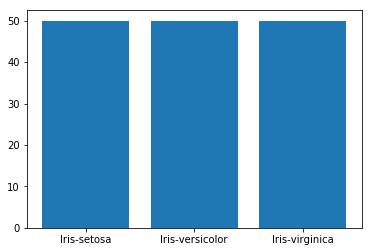

In [7]:
%matplotlib inline

class_x = iris_df.groupby('class').size().reset_index(name="counts")['class']
class_y = iris_df.groupby('class').size().reset_index(name='counts')['counts']

plt.bar(class_x, class_y)

We have made some bar graphs to look for any interesting patterns. From the first four, petal length and width seem to have a very similar distribution. The last graph confirms that the three classes are distributed evenly in the dataset. Let's check the correlation between our features

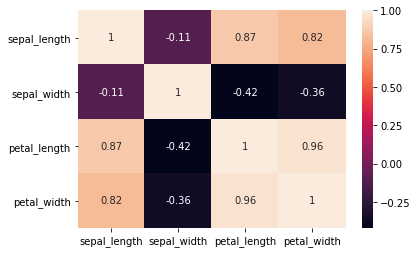

In [8]:
correlations = iris_df[features].corr()
sns.heatmap(correlations, xticklabels=correlations.columns, yticklabels=correlations.columns, annot=True)

This heatmap shows that some of our variables have very high correlations with each other. Particularly petal length/width and sepal length seem to be related, and petal length and width are highly correlated (.96). Let's make some plots

Text(0.5,1,'Sepal Width by Class')

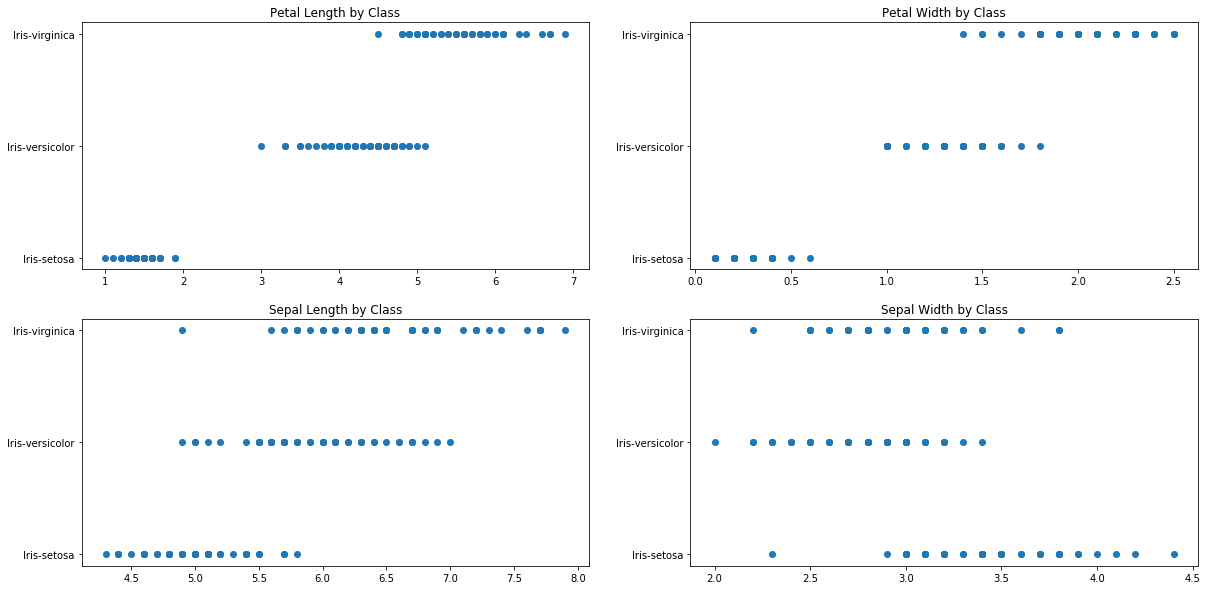

In [9]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

axes[0,0].scatter(x='petal_length',y='class',data=iris_df)
axes[0,0].set_title('Petal Length by Class')

axes[0,1].scatter(x='petal_width', y='class', data=iris_df)
axes[0,1].set_title('Petal Width by Class')

axes[1,0].scatter(x='sepal_length', y='class', data=iris_df)
axes[1,0].set_title('Sepal Length by Class')

axes[1,1].scatter(x='sepal_width', y='class', data=iris_df)
axes[1,1].set_title('Sepal Width by Class')

Above we can see how the different attributes are distributed for each of the classes. 

In [10]:
from sklearn.model_selection import train_test_split

iris_features = iris_df[features]
iris_target = iris_df.replace({'class': {'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-virginica': 3}})['class']


x_train,x_test,y_train,y_test=train_test_split(iris_features, iris_target, test_size=0.2, random_state=11)

print("x_train: ", x_train.shape)
print("y_train: ", y_train.shape)
print("x_test: ", x_test.shape)
print("y_test: ", y_test.shape)

x_train:  (120, 4)
y_train:  (120,)
x_test:  (30, 4)
y_test:  (30,)


We have now split our data into train and test sets. Let's try out some models to see how we can do. We will start with logistic regression

In [11]:
# import logistic regression and make an object
from sklearn.linear_model import LogisticRegression

lreg = LogisticRegression()

In [12]:
print(x_train.shape)
print(y_train.shape)
print(type(x_train))
print(type(y_train.ravel()))

lreg.fit(x_train, y_train.ravel())  # note the ravel was needed to avoid an error

(120, 4)
(120,)
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
y_predict = lreg.predict(x_test)

In [14]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_predict) * 100)

86.66666666666667


Here are the initial accuracy results from our first regression. It looks like we predicted 86.6% of the cases accurately. Not bad, but I can probably do better by playing with the model a bit. Let's dig into our first results a little bit more before we try that though.

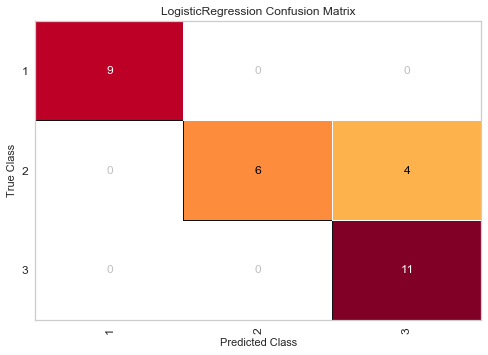

In [15]:
from yellowbrick.classifier import ConfusionMatrix

classes = [1,2,3]
cm = ConfusionMatrix(lreg, classes=classes)
cm.fit(x_train, y_train)
cm.score(x_test, y_test.ravel())
cm.poof()

The confusion matrix created above gives a clearer picture of what is happening with our model. The model accurately predicted flowers in class 1 (setosa) and all of the virginica flowers were correctly placed in class 3. There seems to be some difficulty differentiating class 2 flowers from class 3 flowers, though as we incorreclty identified 4 class 2 (versicolor) flowers as class 3.

I'm curious whether petal and sepal 'area' have any relationship with the class. To check this, let's make some new columns that multiply the length and width and see how that relates to the class with a scatter plot

In [18]:
iris_df['sepal_area'] = (iris_df['sepal_length']) * (iris_df['sepal_width'])
iris_df['petal_area'] = (iris_df['petal_length']) * (iris_df['petal_width'])
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,class,sepal_area,petal_area
0,5.1,3.5,1.4,0.2,Iris-setosa,17.85,0.28
1,4.9,3.0,1.4,0.2,Iris-setosa,14.70,0.28
2,4.7,3.2,1.3,0.2,Iris-setosa,15.04,0.26
3,4.6,3.1,1.5,0.2,Iris-setosa,14.26,0.30
4,5.0,3.6,1.4,0.2,Iris-setosa,18.00,0.28


In [19]:
print(iris_df['class'].shape)
print(iris_df['sepal_area'].shape)

(150,)
(150,)


Text(0.5,1,'Petal Area and class')

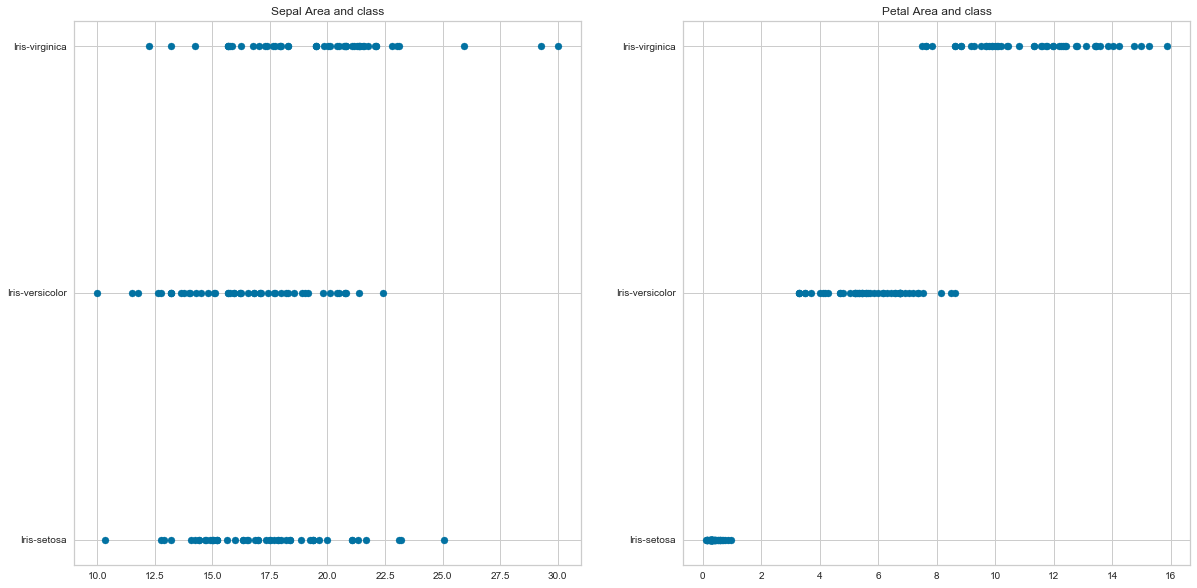

In [20]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

fig, axes = plt.subplots(nrows = 1, ncols = 2)

axes[0].scatter(x='sepal_area', y='class', data=iris_df)
axes[0].set_title('Sepal Area and class')
axes[1].scatter(x='petal_area', y='class', data=iris_df)
axes[1].set_title('Petal Area and class')

Sepal area seems pretty useless for predicting as there is considerable overlap for the values across classes, but petal area seems like it might be helpful. I want to run another regression that takes this new column into account to see if we can get an better results

In [21]:
iris_df.drop(['sepal_area'], axis=1, inplace=True)
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,class,petal_area
0,5.1,3.5,1.4,0.2,Iris-setosa,0.28
1,4.9,3.0,1.4,0.2,Iris-setosa,0.28
2,4.7,3.2,1.3,0.2,Iris-setosa,0.26
3,4.6,3.1,1.5,0.2,Iris-setosa,0.30
4,5.0,3.6,1.4,0.2,Iris-setosa,0.28


In [22]:
new_features=["sepal_length", "sepal_width", "petal_length", "petal_width", "petal_area"]

iris_features_area = iris_df[new_features]
iris_target = iris_df.replace({'class': {'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-virginica': 3}})['class']

x_train,x_test,y_train,y_test=train_test_split(iris_features_area, iris_target, test_size=0.2, random_state=11)
lreg_area=LogisticRegression()

In [23]:
lreg_area.fit(x_train, y_train.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
results = lreg_area.predict(x_test)

In [25]:
print(accuracy_score(y_test,results))

0.9333333333333333


Awesome! This new model seems to perform better than the last one did. Let's take a look at the confusion matrix to see some detail

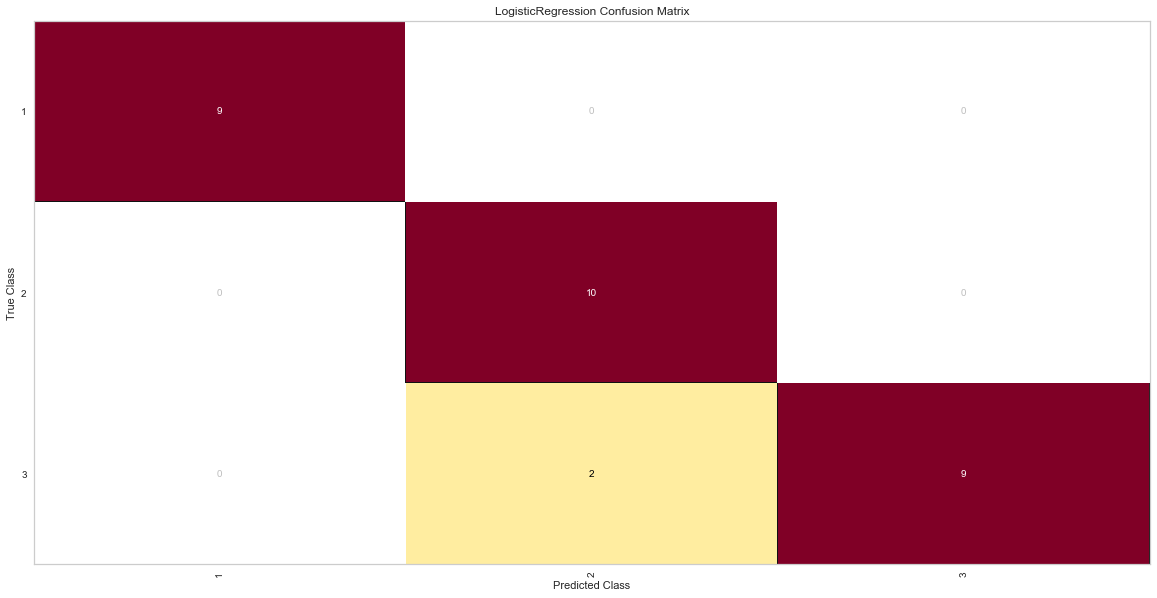

In [26]:
cm = ConfusionMatrix(lreg_area, classes=classes)
cm.fit(x_train, y_train)
cm.score(x_test, y_test.ravel())
cm.poof()

We can see that this model misclassified 2 class 3 flowers as class 2. It looks like adding the area column was able to reduce misclassifications by 50%!